## Convenrt BGR to RGB for matplotlib
a good choice for your projects is to show the images using the
Matplotlib package instead of the functionality offered by OpenCV. Now we are
going to see now how we can deal with the different color formats in the two
libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
numpy_version = np.__version__
opencv_version = cv2.__version__
print("NUmpy version:{numpy}".format(numpy = numpy_version))
print("OpenCv version:{opencv}".format(opencv = opencv_version))



NUmpy version:1.16.2
OpenCv version:4.2.0


## DisplayImage Function.
We have created "displayImage" function to show images. we can use cv2.imshow instead of it,But this function would be convinient to show multiple image simultaneously without opening new windows

In [4]:
def displayImage(imageList):
    plt.figure(figsize=(30,20))
    i = 0
    for item in imageList:  
        plt.subplot(1, 5, i+1)
        plt.imshow(item['image'])
        i += 1
        plt.axis('off')
        plt.title(item['name'])
    plt.show()
#imageList = [{'name':'Original','image':image},{'name':'Gray Scale','image':gray},]

##
The image is stored in the img_OpenCV variable because the cv2.imread() function
loads the image in BGR order. Then, we split the loaded image into its three
channels, (b, g, r), using the cv2.split() function.

In [5]:
bgr_image = cv2.imread('images/dog1.jpg')
# Split the loaded image into its three channels (b, g, r):
b, g, r = cv2.split(bgr_image)
# Merge again the three channels but in the RGB format:
rgb_image = cv2.merge([r, g, b])

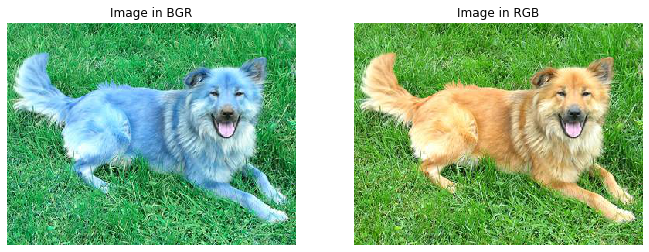

In [5]:
displayImage([{'name':'Image in BGR','image':bgr_image},{'name':'Image in RGB','image':rgb_image}])

In [6]:
## Let see this image in cv2Window
img_concats = np.concatenate((bgr_image, rgb_image), axis=1)
# cv2.imshow('bgr image and rgb image', img_concats)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Splitting Image Method 2:

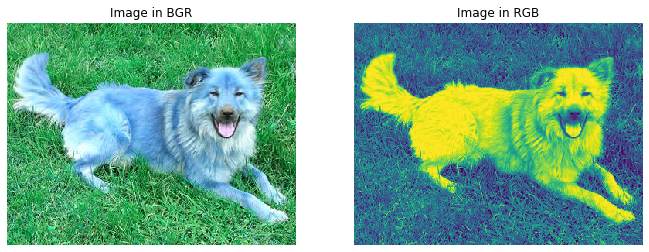

In [9]:
# Using numpy capabilities to get the channels and to build the RGB image
# Get the three channels (instead of using cv2.split):
B = bgr_image[:, :, 0]
G = bgr_image[:, :, 1]
R = bgr_image[:, :, 2]
img_concats = np.concatenate((R, G,B), axis=1)
image_rgb2 = R
displayImage([{'name':'Image in BGR','image':bgr_image},{'name':'Image in RGB','image':image_rgb2}])

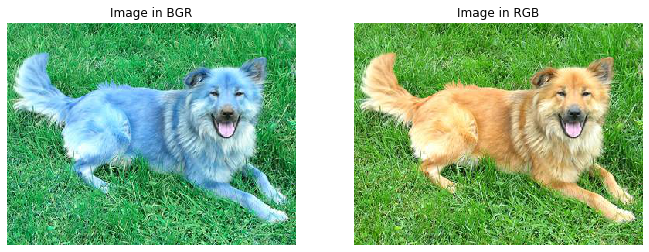

In [11]:
# Transform the image BGR to RGB using Numpy capabilities:
img_matplotlib = bgr_image[:, :, ::-1]
displayImage([{'name':'Image in BGR','image':bgr_image},{'name':'Image in RGB','image':img_matplotlib}])

## Playing Video in backword

In [12]:
## Play video normalyy
# Create a VideoCapture object and read from input file 
cap = cv2.VideoCapture('video/birthday.mp4')  
# Check if camera opened successfully 
if (cap.isOpened()== False):  
  print("Error opening video  file") 
   
# Read until video is completed 
while(cap.isOpened()): 
  ret, frame = cap.read() 
  if ret == True: 
    # Display the resulting frame 
    cv2.imshow('Frame', frame) 
    # Press Q on keyboard to  exit 
    if cv2.waitKey(25) & 0xFF == ord('q'): 
        break
  # Break the loop 
  else:
        break

#When everything done, release  
# the video capture object 
cap.release() 
# Closes all the frames 
cv2.destroyAllWindows() 

# Using the properties â€“ playing a video backwards:
To see how we can use the aforementioned properties, we are going to understand:
which uses some of these
properties to load a video and output it backwards, showing the last frame of the
video first and so on.
cv2.CAP_PROP_FRAME_COUNT : This property provides the total number of frames
cv2.CAP_PROP_POS_FRAMES: This property provides the current frame
The first step is to get the index of the last frame

# We get the index of the last frame of the video file:
frame_index = capture.get(cv2.CAP_PROP_FRAME_COUNT) - 1
# We set the current frame position
capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
# Capture frame-by-frame from the video file
ret, frame = capture.read()
Finally, we decrement the index in order to read the next frame from the video
file
# Decrement the index to read next frame
frame_index = frame_index - 1

In [16]:
def playVideoBackword():
    cap = cv2.VideoCapture('video/birthday.mp4')  
    if (cap.isOpened()== False):  
      print("Error opening video  file") 

    countFrame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    currentFrame = cap.get(cv2.CAP_PROP_POS_FRAMES)
    print("Frame Count: {countFrame}".format(countFrame = countFrame))
    print("Current Frame: {currentFrame}".format(currentFrame = currentFrame))
    ## We get the index of the last frame of the video file
    frame_index = cap.get(cv2.CAP_PROP_FRAME_COUNT) - 1
    print("Frame Index: {index}".format(index = frame_index))
    # We set the current frame position

    while(cap.isOpened()): 
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read() 
        if ret == True: 
            cv2.imshow('Frame', frame) 
            frame_index = frame_index - 1
        if cv2.waitKey(25) & 0xFF == ord('q'): 
            break
    cap.release() 
    cv2.destroyAllWindows() 
    
playVideoBackword()

Frame Count: 352.0
Current Frame: 0.0
Frame Index: 351.0
